# AirBnb case study

Load the dataset

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('AB_NYC_2019.csv')

In [31]:
# Display basic info and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [32]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


Check for missing values

In [33]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [34]:
# Dropping non-essential columns
df.drop(columns=['name', 'host_name', 'last_review'], inplace=True)  

In [35]:
# Fill missing values

df.fillna({'reviews_per_month': 0}, inplace=True)

In [36]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [37]:
df.shape

(48895, 13)

## Outlier 

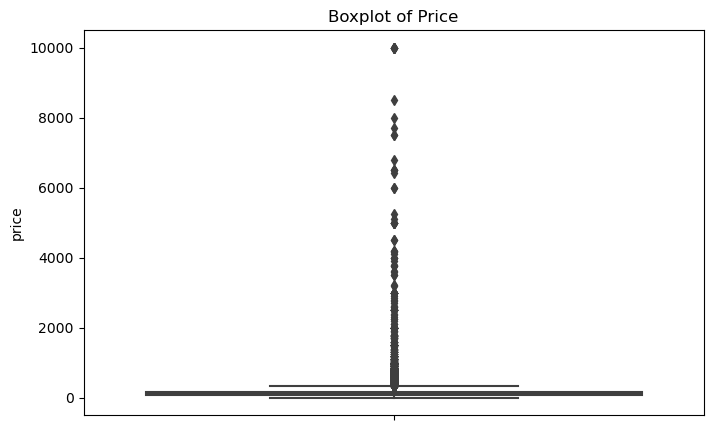

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['price'])  
plt.title("Boxplot of Price")
plt.show()

In [39]:
# Outlier Detection and Removal (Price Capped at $1,000 (removed extreme luxury properties).)

price_limit = 1000
df = df[df['price'] <= price_limit]

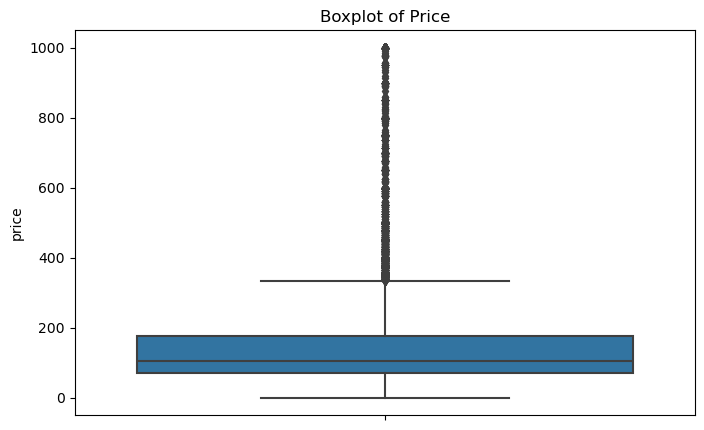

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['price'])  
plt.title("Boxplot of Price")
plt.show()

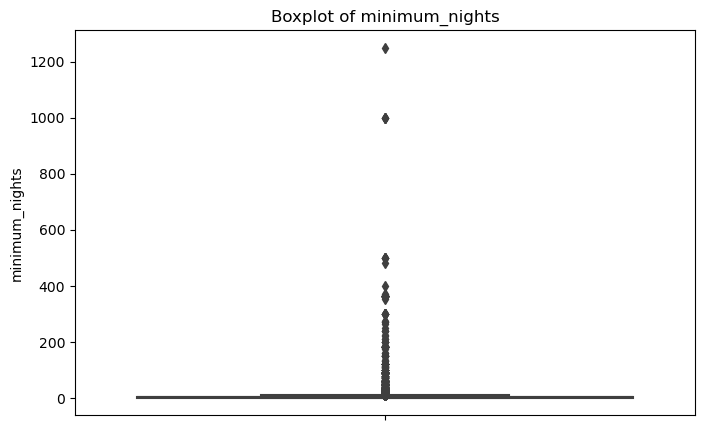

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['minimum_nights'])  
plt.title("Boxplot of minimum_nights")
plt.show()

In [42]:
# Some listings have minimum_nights up to 1,200, which seems unrealistic.

# Limiting Minimum Nights to a thershold value (excluded long-term rentals).

Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

In [43]:
Q3

5.0

In [44]:
upper_limit

11.0

In [45]:
df = df[df['minimum_nights'] <= upper_limit]

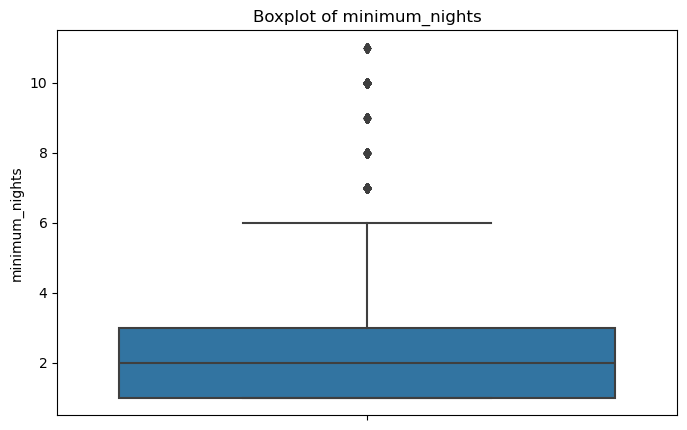

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['minimum_nights'])  
plt.title("Boxplot of minimum_nights")
plt.show()

## EDA

c:\Users\kdkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


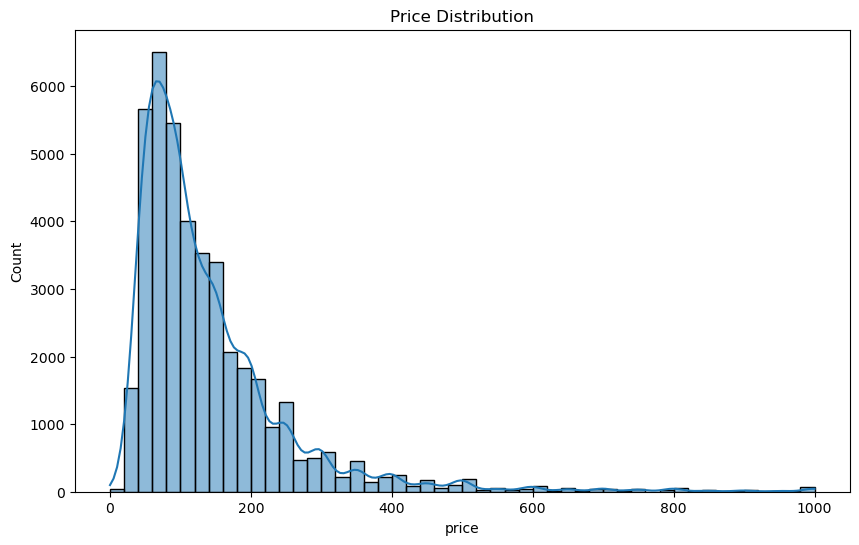

In [47]:
# visualizing price distribution. ​
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

### Insights from Price Distribution:
#### Most listings have prices below $200.
#### The distribution is right-skewed, indicating a few high-priced listings.
#### Prices peak around $50–$100, suggesting affordability for most properties.

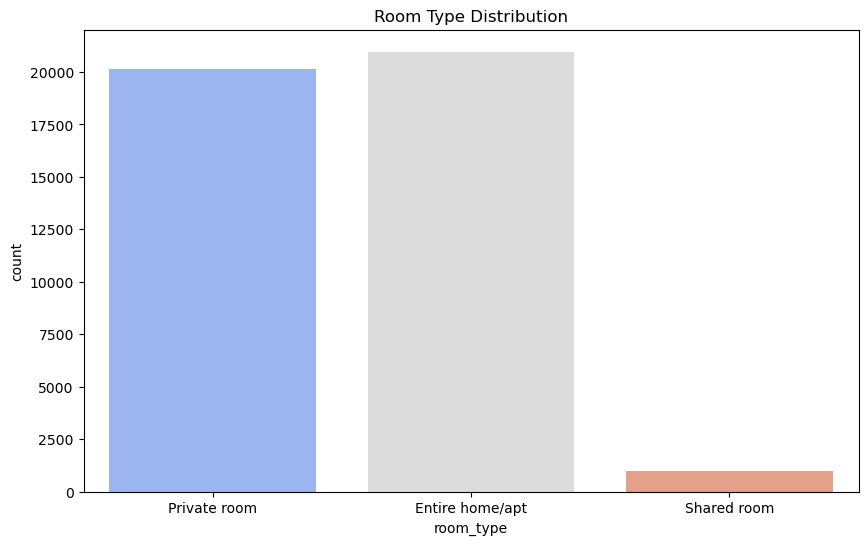

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, palette='coolwarm')
plt.title('Room Type Distribution')
plt.show()

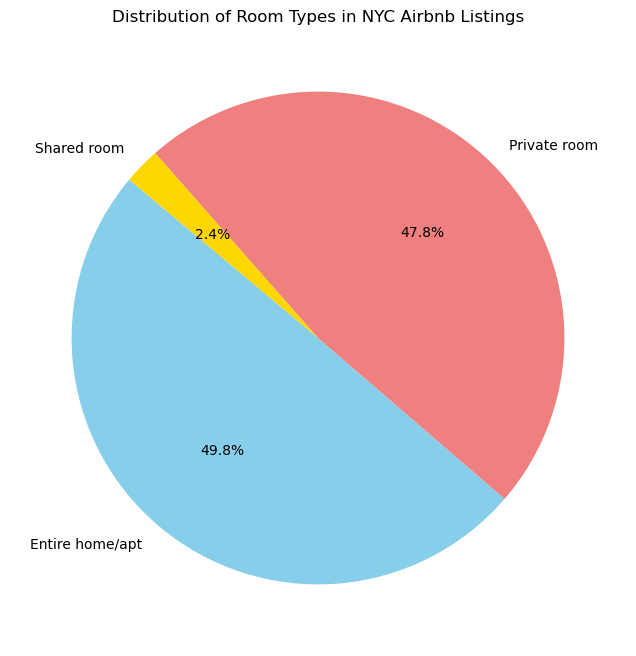

In [ ]:
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(8, 8))


colors = ["skyblue", "lightcoral", "gold", "lightgreen"]
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Distribution of Room Types in NYC Airbnb Listings")
plt.show()

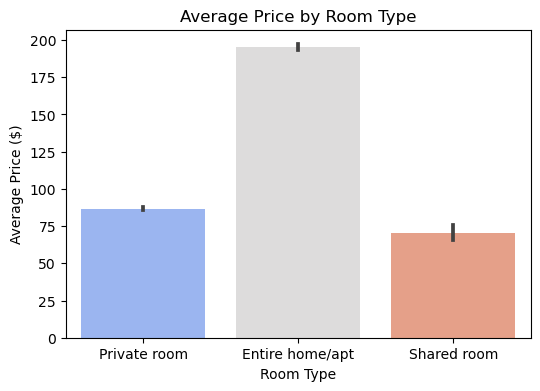

In [ ]:
# Average price by room type
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='room_type', y='price', palette='coolwarm', estimator=lambda x: x.mean())
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.title("Average Price by Room Type")
plt.show()

### Room Type Insights:
#### Most listings are for Entire Home/Apt, followed by Private Rooms.
#### Shared Rooms are the least common.
#### Entire homes are the most expensive, averaging ~$190 per night.
#### Private rooms (~$80) and shared rooms (~$60) are more affordable.

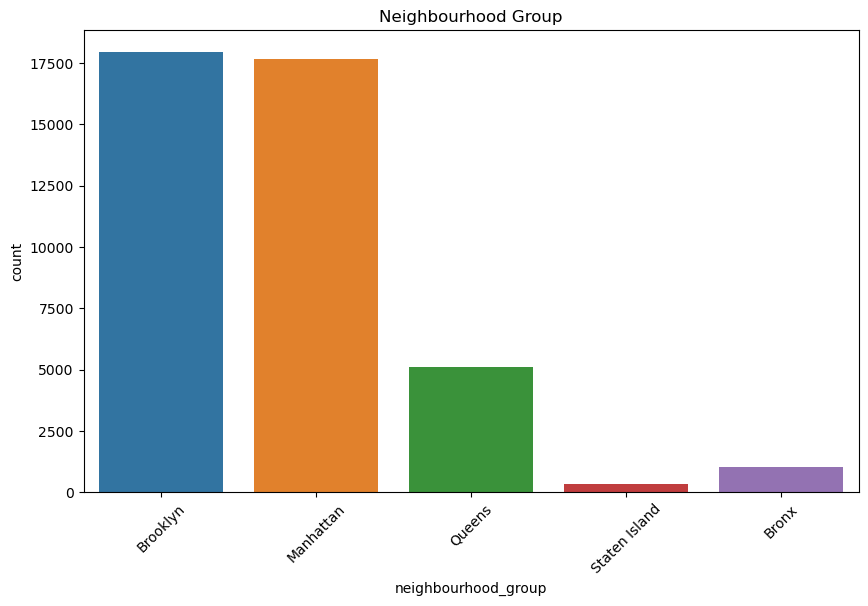

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

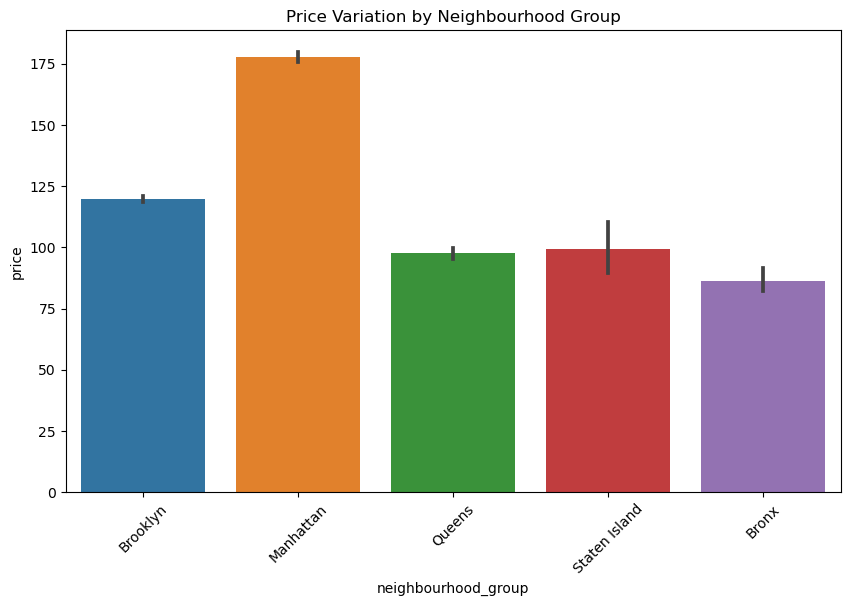

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Variation by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

### Neighborhood Insights:
#### Manhattan & Brooklyn dominate in listings.
#### Queens, Bronx, and Staten Island have fewer listings.
#### Manhattan has the highest prices (~$180 avg.), followed by Brooklyn (~$120).
#### Queens, Bronx, and Staten Island are more affordable (~$80–$100).

c:\Users\kdkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


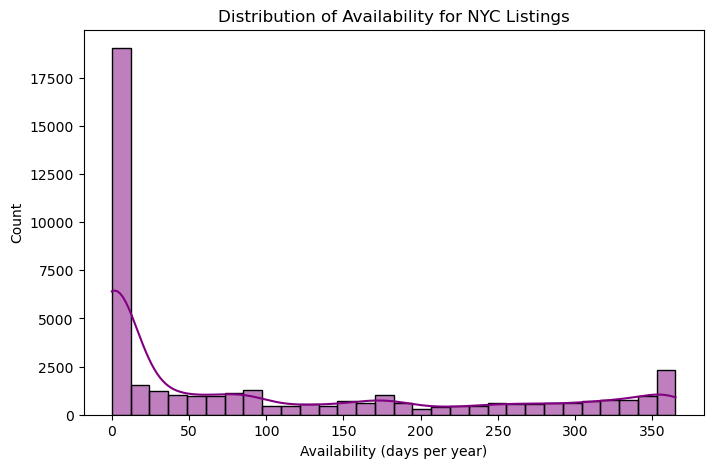

In [ ]:
# Availability distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['availability_365'], bins=30, kde=True, color='purple')
plt.xlabel("Availability (days per year)")
plt.ylabel("Count")
plt.title("Distribution of Availability for NYC Listings")
plt.show()

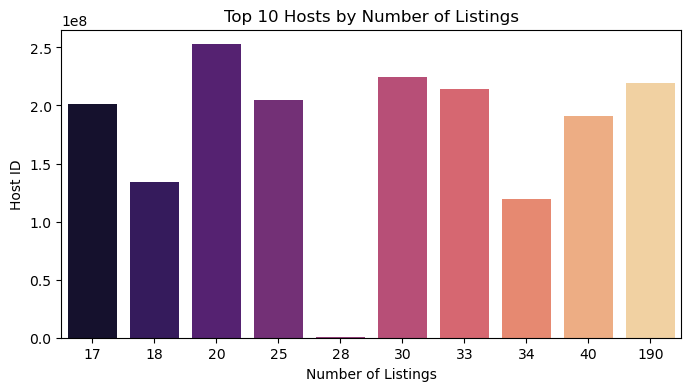

In [ ]:
# Top 10 hosts by number of listings
top_hosts = df['host_id'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(y=top_hosts.index, x=top_hosts.values, palette="magma")
plt.xlabel("Number of Listings")
plt.ylabel("Host ID")
plt.title("Top 10 Hosts by Number of Listings")
plt.show()

### Availability & Host Insights:
#### Most listings have very low availability (0–50 days/year).
#### A smaller fraction is available all year round (365 days).
#### Some hosts manage over 300 listings, indicating commercial operations.